## FOR GOOGLE COLLAB USERS ONLY: Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/My Drive/Colab Notebooks/CAS BDAI/NLP/data/'
path="drive/My Drive/Colab Notebooks/CAS BDAI/2021/TextminingNLP/data/"
filename = 'damascus-fighting.txt'
damascus_file = path+filename
filename = 'dublin-festivities.txt'
dublin_file = path+filename

## FOR ANACONDA USERS ONLY: Define Local Path

In [ ]:
path="D:\\TextminingNLP\\data\\"
filename = 'damascus-fighting.txt'
damascus_file = path+filename
filename = 'dublin-festivities.txt'
dublin_file = path+filename

## Import NLTK

In [3]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
import matplotlib.pyplot as plt; plt.style.use('seaborn')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## 01 Read Files

In [4]:
f = open(damascus_file, encoding="utf8")

damascus_fighting = f.read()

f = open(dublin_file, encoding="utf8")

dublin_festivities = f.read()


## 02 Sentiment of one word

**WordNet** is the lexical database i.e. dictionary for the English language, specifically designed for natural language processing.

**Synset** is a special kind of a simple interface that is present in NLTK to look up words in WordNet. Synset instances are the groupings of synonymous words that express the same concept. Some of the words have only one Synset and some have several.

In [5]:
word = "happy"
word_synsets = wn.synsets(word)
print(word_synsets)

[Synset('happy.a.01'), Synset('felicitous.s.02'), Synset('glad.s.02'), Synset('happy.s.04')]


A word has several synsets. Usually, it would be better to detect the part of the speech of the word, to improve the prediction of the sentiment. Here we go for the first entry.  In Python, the first entry is the one with the index zero [0].

In [6]:
word_synset = word_synsets[0]
swn_synset = swn.senti_synset(word_synset.name())
pos = swn_synset.pos_score()
neg = swn_synset.neg_score()
obj = swn_synset.obj_score()
print(swn_synset)

<happy.a.01: PosScore=0.875 NegScore=0.0>


In [7]:
print("The word {} has a sentiment of pos {} and neg {}, with an objectivity of {}".format(word, pos, neg, obj))

The word happy has a sentiment of pos 0.875 and neg 0.0, with an objectivity of 0.125


## 03 Function Definition

In [8]:
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None



def swn_polarity(text):
    token,pos,neg,diff = [],[],[],[]
    """
    Return a sentiment polarity: 0 = negative, 1 = positive
    """
    
    sentiment = 0.0
    tokens_count = 0

    # text = clean_text(text)

    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))

        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            token.append(word)
            #lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            #if not lemma:
            #    continue
                
            
            synsets = wn.synsets(word, pos=wn_tag)
            if not synsets:
                continue
                


            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            dscore = swn_synset.pos_score() - swn_synset.neg_score()

            sentiment += dscore
            
            # store values for plot
            pos.append(swn_synset.pos_score())
            neg.append(-1*swn_synset.neg_score())
            diff.append(dscore)
            
            tokens_count += 1


    # judgment call ? Default to positive or negative
    if not tokens_count:
        return 0,token,pos,neg,diff

    # sum greater than 0 => positive sentiment
    if sentiment >= 0:
        return 1,token,pos,neg,diff

    # negative sentiment
    return 0,token,pos,neg,diff

def plot_sentiment(pos,neg):
    plt.plot(pos, color='green')
    plt.plot(neg, color='red')
    #plt.plot(diff)
    plt.grid(True)
    plt.show()

## 04 calculate and visualise sentiments for documents

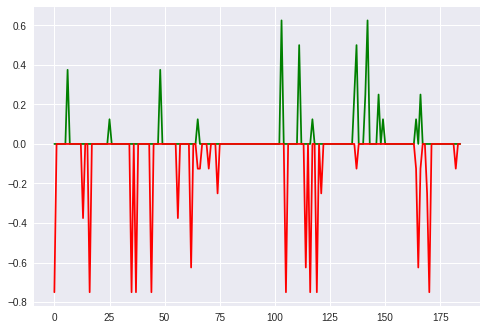

In [9]:
pol,token,pos,neg,diff= swn_polarity(damascus_fighting)
plot_sentiment(pos,neg)

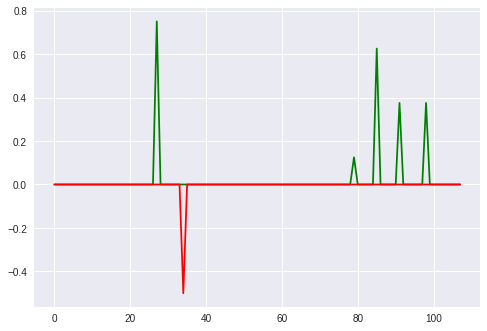

In [10]:
pol,token,pos,neg,diff=swn_polarity(dublin_festivities)
plot_sentiment(pos,neg)


**Your Turn:** Do a sentiment plot of the file story.txt
Is that a happy or a sad story overall?


